In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [10]:
(train_images,train_labels),(test_images,test_labels) = keras.datasets.cifar10.load_data()
print(train_images[52][0])
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


[[ 63  70  37]
 [ 77  88  63]
 [ 66  88  63]
 [ 50  77  43]
 [ 46  77  31]
 [ 53  88  33]
 [ 52  85  34]
 [ 68  97  45]
 [ 78  95  40]
 [ 56  75  36]
 [ 49  71  37]
 [ 51  68  34]
 [ 63  74  41]
 [ 61  76  47]
 [ 80  92  67]
 [ 60  77  51]
 [ 21  45  24]
 [ 33  61  36]
 [ 42  66  40]
 [ 65  81  56]
 [ 91 100  75]
 [ 98 101  79]
 [ 97  98  81]
 [ 91  98  83]
 [ 63  74  58]
 [ 70  75  57]
 [ 92  97  73]
 [118 114  91]
 [ 94 101  75]
 [ 76  91  65]
 [ 86  94  71]
 [114 116  95]]


In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0
# print(train_images[0])

In [25]:
# plt.imshow(train_images[14])
# clear_output()

In [19]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation=keras.activations.relu,input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64,(3,3),activation=keras.activations.relu))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(64,(3,3),activation=keras.activations.relu))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [24]:
model.compile(metrics=['accuracy'],optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [25]:
model.fit(train_images,train_labels,epochs=10)
# keras.models.save_model(model=model,filepath='./Model')

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5034 - accuracy: 0.4547

In [31]:
keras.models.save_model(model=model,filepath='./Model',overwrite=True)
loss,acc = model.evaluate(test_images,test_labels)

Correct  => bird Predicted => automobile


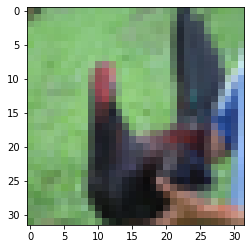

In [53]:
model = keras.models.load_model('./Model')
def predict(image,label):
    prediction = model.predict(np.array([image]))
    prediction = np.argmax(prediction)
    plt.imshow(image)
    print(f"Correct  => {class_names[label[0]]} Predicted => {class_names[prediction]}")


num = int(input("Enter A Num"))
image = test_images[num]
label = test_labels[num]
predict(image,label)
